<a href="https://colab.research.google.com/github/HarshESC/TalkData-Mobile-Demographics/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EDA Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Final Capstone"

Mounted at /content/gdrive
/content/gdrive/My Drive/Final Capstone


In [ ]:
# Reading each data file
# Reducing the file data size by 40% for memory
app_events = pd.read_csv("app_events.csv", nrows=19483840)
app_labels = pd.read_csv("app_labels.csv", nrows=275966)
events = pd.read_csv("events.csv", nrows=1951770)
gender_age_train = pd.read_csv("gender_age_train.csv", nrows=44787)
gender_age_test = pd.read_csv("gender_age_test.csv", nrows=67243)
category_labels = pd.read_csv("label_categories.csv", nrows=558)
phone_brand = pd.read_csv("phone_brand_device_model.csv", nrows=112347)


## Let's Take a look at the Datasets

In [ ]:
app_events.head()

event_id               app_id  is_installed  is_active
0         2  5927333115845830913             1          1
1         2 -5720078949152207372             1          0
2         2 -1633887856876571208             1          0
3         2  -653184325010919369             1          1
4         2  8693964245073640147             1          1

In [ ]:
events.head()

event_id            device_id            timestamp  longitude  latitude
0         1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
1         2 -6401643145415154744  2016-05-01 00:54:12     103.65     30.97
2         3 -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3         4 -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4         5 -5373797595892518570  2016-05-01 00:07:18     115.88     28.66

In [ ]:
app_labels.head()


app_id  label_id
0  7324884708820027918       251
1 -4494216993218550286       251
2  6058196446775239644       406
3  6058196446775239644       407
4  8694625920731541625       406

In [ ]:
category_labels.head()


label_id           category
0         1                NaN
1         2     game-game type
2         3   game-Game themes
3         4     game-Art Style
4         5  game-Leisure time

In [ ]:
phone_brand.head()


device_id phone_brand   device_model
0 -8890648629457979026          小米             红米
1  1277779817574759137          小米           MI 2
2  5137427614288105724          三星      Galaxy S4
3  3669464369358936369       SUGAR           时尚手机
4 -5019277647504317457          三星  Galaxy Note 2

A lot of these phone brands contain chinese characters.  We will translate them as part of the merging.

# Exploratory Data Analysis

##Merging Datasets together

In [ ]:
# Merging app_events and event_id through event_id column
merged_events = pd.merge(app_events, events, on="event_id")


In [ ]:
# Merging app_labels and category_labels through label_id
merged_apps = pd.merge(app_labels, category_labels, on="label_id")


In [ ]:
merged_events.shape

(19478586, 8)

In [ ]:
merged_apps.shape

(60542, 3)

In [ ]:
# Merging previous merged data tables together to make larger data frame
merged_events_apps = pd.merge(merged_events, merged_apps, on="app_id")


In [ ]:
# Adding phone brand to merged_events_apps through device_id merge
merged_events_apps_brands = pd.merge(merged_events_apps, phone_brand, on="device_id")


In [ ]:
# Creating final data frame by merging gender and age with previous dataframe
master_df = pd.merge(merged_events_apps_brands, gender_age_train, on="device_id")
master_df.tail()


event_id              app_id  is_installed  ...  gender  age   group
4516274   1644253   34559227754570733             1  ...       M   26  M23-26
4516275   1644253   34559227754570733             1  ...       M   26  M23-26
4516276   1874484   34559227754570733             1  ...       M   26  M23-26
4516277   1874484   34559227754570733             1  ...       M   26  M23-26
4516278   1313077 -626198893166693462             1  ...       M   29  M29-31

[5 rows x 15 columns]

In [ ]:
master_df.shape

(4516279, 15)

# Translate Chinese Phone Brands into English

In [ ]:
# Most of these were manually entered to get proper translation
to_english = {
    "华为": "huawei", 
    "小米": "xiaomi",  
    "魅族": "meizu", 
    "vivo": "vivo", 
    "酷派": "coolpad",  
    "索尼": "sony",  
    "OPPO": "oppo",  
    "LG": "lg",
    "HTC": "htc",  
    "金立": "gionee",  
    "中兴": "zte",  
    "奇酷": "qiku",  
    "TCL": "tcl", 
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
}


In [ ]:
# Created new column for phone brand, can now drop old phone_brand column
master_df["english_phone_brand"] = master_df["phone_brand"].map(to_english)
master_df = master_df.drop(columns=["phone_brand"])


In [ ]:
master_df.shape

(4516279, 15)

# Exploratory Charts

In [ ]:
# Descriptive statistics.
master_df.describe()

event_id        app_id  ...      label_id           age
count  4.516279e+06  4.516279e+06  ...  4.516279e+06  4.516279e+06
mean   9.716941e+05  1.321011e+18  ...  4.546896e+02  3.414907e+01
std    5.635599e+05  5.200231e+18  ...  1.202579e+02  9.694198e+00
min    3.500000e+01 -9.216716e+18  ...  2.510000e+02  1.300000e+01
25%    4.845450e+05 -2.735762e+18  ...  3.030000e+02  2.700000e+01
50%    9.696500e+05  1.665047e+18  ...  5.480000e+02  3.200000e+01
75%    1.461402e+06  5.927333e+18  ...  5.490000e+02  4.000000e+01
max    1.951730e+06  9.222073e+18  ...  5.680000e+02  8.800000e+01

[8 rows x 9 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf0b2c7710>,
      dtype=object)

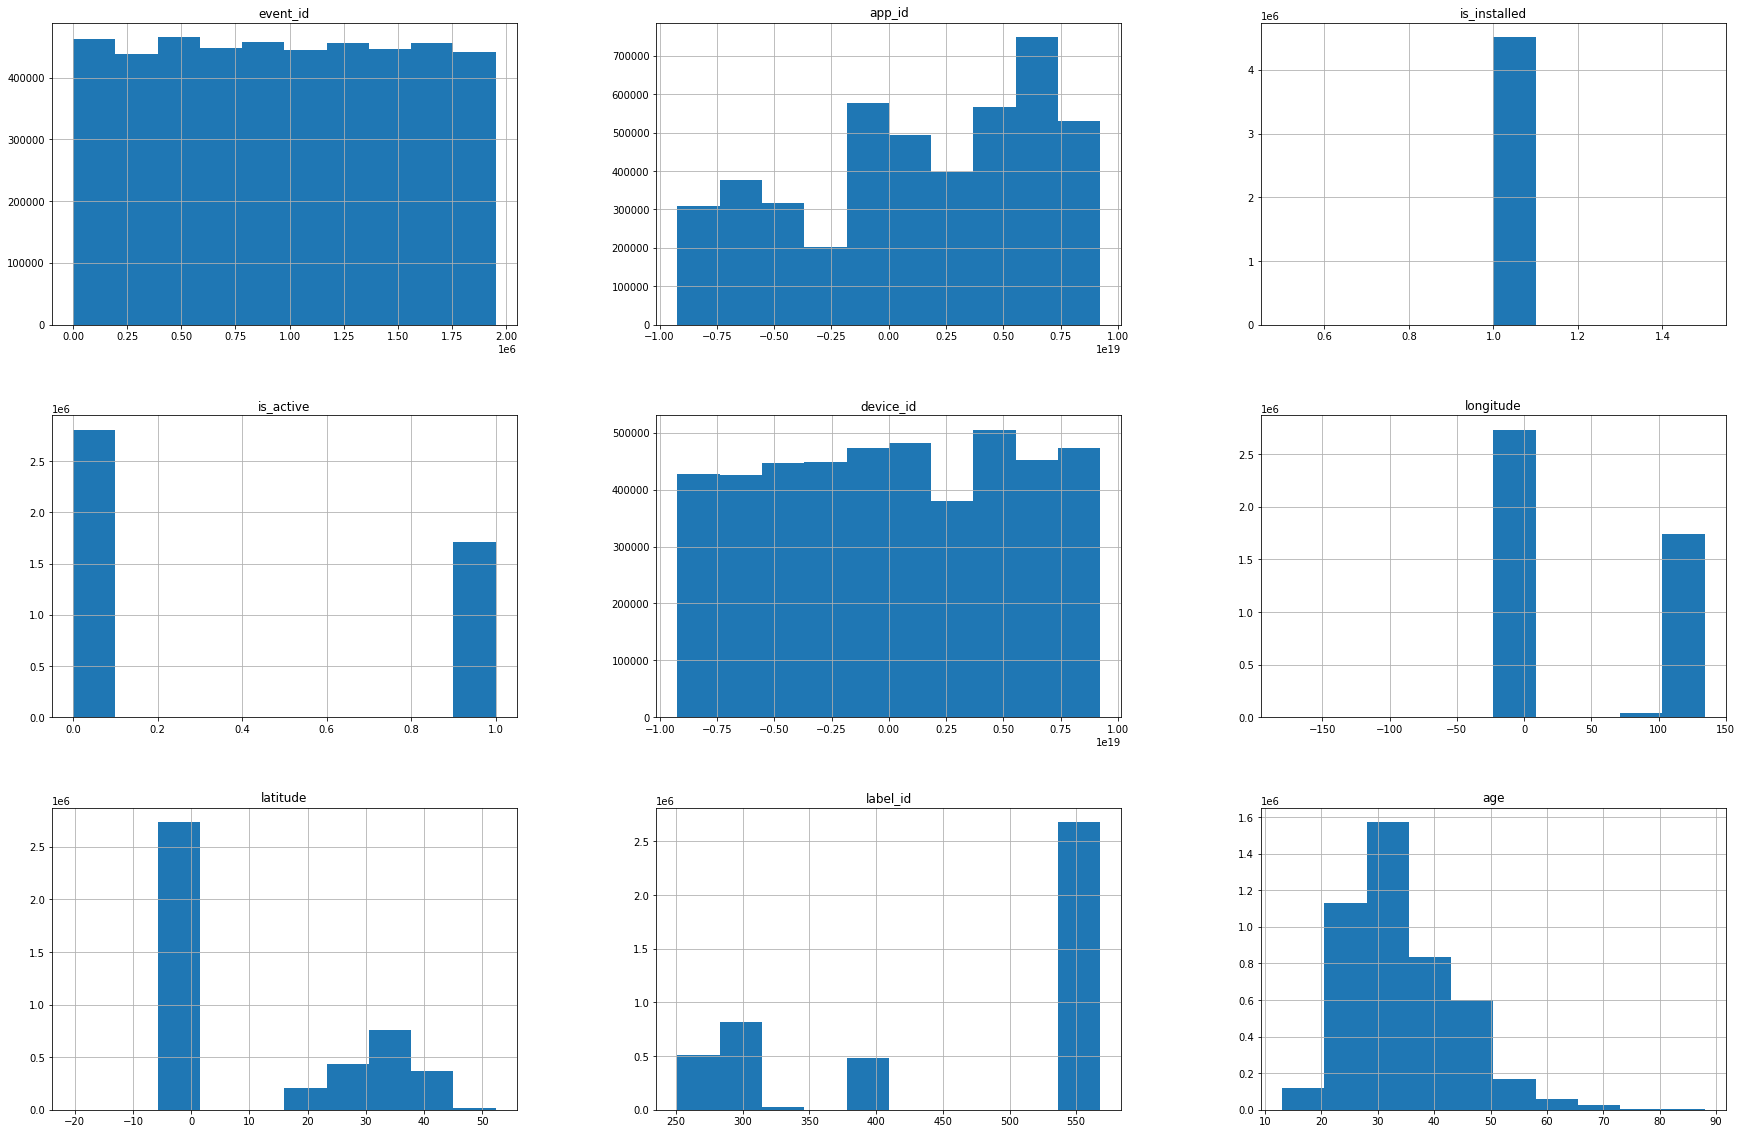

In [ ]:
# Histogram
master_df.hist(figsize=(30,20))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


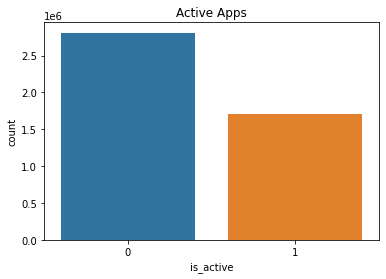

In [ ]:
sns.countplot(master_df["is_active"])
plt.title("Active Apps")
plt.show()


In [ ]:
master_df['age'].value_counts()

28    307065
29    239738
26    238631
27    215514
24    202357
       ...  
77       164
81       153
75        98
13        60
14        25
Name: age, Length: 69, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


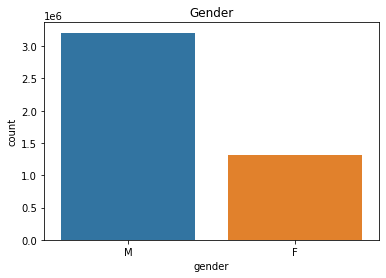

In [ ]:
sns.countplot(master_df["gender"])
plt.title("Gender")
plt.show()

In [ ]:
master_df.isnull()

event_id  app_id  is_installed  ...    age  group  english_phone_brand
0           False   False         False  ...  False  False                False
1           False   False         False  ...  False  False                False
2           False   False         False  ...  False  False                False
3           False   False         False  ...  False  False                False
4           False   False         False  ...  False  False                False
...           ...     ...           ...  ...    ...    ...                  ...
4516274     False   False         False  ...  False  False                False
4516275     False   False         False  ...  False  False                False
4516276     False   False         False  ...  False  False                False
4516277     False   False         False  ...  False  False                False
4516278     False   False         False  ...  False  False                False

[4516279 rows x 15 columns]

In [ ]:
master_df['english_phone_brand'].value_counts()

huawei       1670929
xiaomi        794651
samsung       532090
meizu         386535
oppo          286386
coolpad       181779
vivo          151890
lenovo         89464
lshi           85953
htc            64347
nubia          37059
oneplus        29265
zte            25353
gionee         25198
hammer         24174
sony           22058
qiku           16138
asus           13690
lg              8100
tcl             7362
ccmc            6636
aiyouni         5736
yuxin           4702
Ktouch          3716
newman          3626
hasse           1653
moto            1577
nibilu          1558
hisense         1133
meitu            920
dowe             486
lingyun          386
xiangmi          313
koobee           279
kupo             267
weitu            262
epai             232
panosonic        190
google           145
bigcola          113
ada               83
youmi             83
wpf               48
banghua           30
nokia             29
ipair             19
weimi              9
Name: english

In [ ]:
master_df['english_phone_brand'] = master_df['english_phone_brand'].fillna('asus')


In [ ]:
master_df.isnull().sum()*100/master_df.isnull().count()

event_id               0.0
app_id                 0.0
is_installed           0.0
is_active              0.0
device_id              0.0
timestamp              0.0
longitude              0.0
latitude               0.0
label_id               0.0
category               0.0
device_model           0.0
gender                 0.0
age                    0.0
group                  0.0
english_phone_brand    0.0
dtype: float64

Hmm, seems like none of these featuers are very normalized in form.  EventID, Age, and Device ID seem to be the only ones with some level of consistent.  

We will have to perform some cleaning to get them more alligned.  

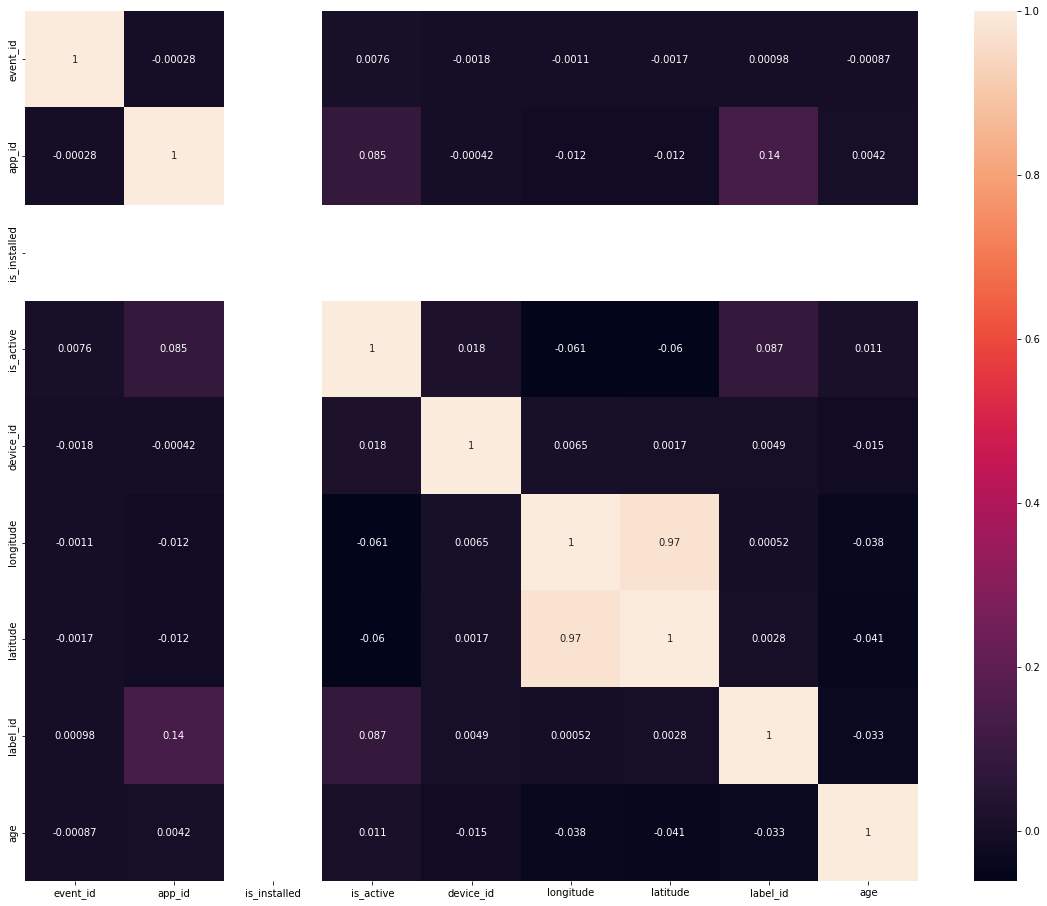


Correlation Table


event_id    app_id  is_installed  ...  latitude  label_id       age
event_id      1.000000 -0.000282           NaN  ... -0.001710  0.000983 -0.000871
app_id       -0.000282  1.000000           NaN  ... -0.012176  0.136246  0.004245
is_installed       NaN       NaN           NaN  ...       NaN       NaN       NaN
is_active     0.007581  0.085340           NaN  ... -0.059927  0.087450  0.011154
device_id    -0.001846 -0.000423           NaN  ...  0.001704  0.004925 -0.014762
longitude    -0.001075 -0.011938           NaN  ...  0.971134  0.000523 -0.037694
latitude     -0.001710 -0.012176           NaN  ...  1.000000  0.002789 -0.040531
label_id      0.000983  0.136246           NaN  ...  0.002789  1.000000 -0.032825
age          -0.000871  0.004245           NaN  ... -0.040531 -0.032825  1.000000

[9 rows x 9 columns]

In [ ]:
# Visualize correlation between independant variables and the target variable. Here, the target variable is 'Chance_of_Admit'
plt.figure(figsize=(20,16))
sns.heatmap(master_df.corr(),annot = True)
plt.show()

print()
print("Correlation Table")
# Correlation factors for 'delay time'.
master_df.corr()

Quite a lot of these do not correlate very well with each other.  Could be due to the overflow of data and the large amount of nulls and other facts.  We will have to drop some of these features and reduce our dataset a bit.  

# Let's finally take a look at the combined final DF

In [ ]:
# Checking data types of each column
# timestamp is an object type,
# convert timestamp to datetime type
master_df.dtypes


event_id                 int64
app_id                   int64
is_installed             int64
is_active                int64
device_id                int64
timestamp               object
longitude              float64
latitude               float64
label_id                 int64
category                object
device_model            object
gender                  object
age                      int64
group                   object
english_phone_brand     object
dtype: object

In [ ]:
master_df["timestamp"] = pd.to_datetime(master_df["timestamp"])


In [ ]:
master_df

event_id               app_id  ...   group  english_phone_brand
0              35  5927333115845830913  ...  M27-28               huawei
1              35  5927333115845830913  ...  M27-28               huawei
2          622492  5927333115845830913  ...  M27-28               huawei
3          622492  5927333115845830913  ...  M27-28               huawei
4         1082239  5927333115845830913  ...  M27-28               huawei
...           ...                  ...  ...     ...                  ...
4516274   1644253    34559227754570733  ...  M23-26               gionee
4516275   1644253    34559227754570733  ...  M23-26               gionee
4516276   1874484    34559227754570733  ...  M23-26               gionee
4516277   1874484    34559227754570733  ...  M23-26               gionee
4516278   1313077  -626198893166693462  ...  M29-31                   lg

[4516279 rows x 15 columns]

## Checking for Sufficient Amount of Values


In [ ]:
pd.set_option("display.max_rows", None)


- Only want to keep event_id with enough data,
- Drop event_id rows with < 100 values


In [ ]:
master_df["event_id"].value_counts()


1495937    482
28574      482
1577858    482
1274697    482
394740     482
1030114    482
1358689    482
1691682    482
1579133    399
515214     399
1202867    399
279442     399
986778     399
1381072    392
1707307    392
737074     392
754927     391
1277518    390
1470223    390
400719     390
36033      390
398566     390
1397618    390
1313333    389
983744     388
1385906    388
1524335    387
1899097    385
1831721    372
1331501    372
367725     372
671303     370
1612673    370
1338029    370
1577695    369
1309976    369
922349     369
58069      369
1440436    369
1114126    369
1310248    369
845959     369
1022145    369
911110     369
1064391    369
1795940    369
714778     360
499337     360
1007517    336
1518962    335
423309     333
541504     333
466449     333
101424     333
572805     332
1181477    332
1822746    332
721736     332
178747     332
1805903    332
1875478    330
1746720    330
139502     330
1513384    330
248943     330
1140136    330
1822747   

In [ ]:
count = master_df["event_id"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["event_id"].isin(keep)]


- Only want to keep app_id values with enough data,
- Drop app_id rows with < 1000 values


In [ ]:
master_df["app_id"].value_counts()


 628020936226491308     41216
 33792862810792679      39066
 4348659952760821294    35205
 7316250158002095415    35016
 4244331088397413857    29572
 8693964245073640147    24190
 7499170796297973860    23670
-5839858269967688123    22232
-653184325026622087     21652
 5927333115845830913    20332
 3358418900419361927    18244
-7377004479023402858    16896
-8022267440849930066    13560
-653184324994839917     13095
 8026407831917254841    13060
 8845251844360692488    12957
 3717049149426646122    12224
 7348340405200054701    12002
-7339430059748502738    11880
 7167114343576723123    11820
 7140875290462183693    11241
-5720078949152207372    10797
 4743373741129926453    10608
 7323585663628099255    10428
-1633887856876571208    10310
-3425831168385824047    10288
 7310940964635812162    10216
 6666573792468194779    10208
-1442117565864503182    10080
-145658454112781034      9780
 3433289601737013244     9760
-6470868058642068725     9665
-8669670269561971184     9618
-621253732

In [ ]:
count = master_df["app_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["app_id"].isin(keep)]


- Appears to be enough information for each value
- Will leave this column alone.


In [ ]:
master_df["is_active"].value_counts()


0    1249629
1     212705
Name: is_active, dtype: int64

- Only want to keep device_id values with enough data,
- Drop device_id rows with < 1000 values


In [ ]:
master_df["device_id"].value_counts()


-4814793614000680392    46493
-806096877239654999     35793
-669426881946113309     23605
 5266220763241423819    22784
 4810860241711208118    19245
 482275638006356959     18699
 2960733785680786248    13398
 8915610511958695063    12944
 3712119186429288439    12670
 1067484264724394277    11334
-5338646207348406245    11166
-2831902398235305114     9464
 1315525989930564136     8667
-8886768683305255724     7928
-2611733232907371667     7650
-5761259307584729199     7348
-6614039245200418472     7299
-9086124425935463138     6166
 4657697113512107583     6108
 6873838308926667080     5782
 8781655188184243016     5726
 1271622673586146475     5602
 6320891847492571879     5514
 1052872047402580097     5375
 3758067143012675964     5341
-4660967967664722680     4703
 4335523533167411251     4660
-8897002098221859467     4505
 3750096294858511612     4372
 5120139772484210579     4213
-454188019495185920      4076
-5127356298948955631     4073
-7804296101691453441     4066
-270390816

In [ ]:
count = master_df["device_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["device_id"].isin(keep)]


- Only want to keep timestamp values with enough data,
- Drop timestamp rows with < 100 values


In [ ]:
master_df["timestamp"].value_counts()


2016-05-02 14:20:11    436
2016-05-02 12:55:20    414
2016-05-02 10:52:19    414
2016-05-01 11:03:30    406
2016-05-01 21:27:12    391
2016-05-07 20:22:23    381
2016-05-01 00:01:25    376
2016-05-07 21:38:59    372
2016-05-04 12:41:42    357
2016-05-06 00:02:47    338
2016-05-07 10:19:50    336
2016-05-01 00:10:46    334
2016-05-01 13:14:52    327
2016-05-02 12:59:20    327
2016-05-01 12:04:27    327
2016-05-02 13:03:06    327
2016-05-04 00:05:27    321
2016-05-05 00:10:42    319
2016-05-07 21:40:56    318
2016-05-06 22:52:17    318
2016-05-07 08:56:23    318
2016-05-06 23:03:44    318
2016-05-05 13:09:32    317
2016-05-03 00:52:15    315
2016-05-03 01:14:42    312
2016-05-01 00:09:18    306
2016-05-06 00:03:16    304
2016-05-02 09:12:31    302
2016-05-01 00:33:16    301
2016-05-07 07:53:36    295
2016-05-05 20:21:56    295
2016-05-02 10:04:52    295
2016-05-07 12:43:37    295
2016-05-06 12:54:04    295
2016-05-01 11:06:39    295
2016-05-01 00:11:03    295
2016-05-03 11:03:02    295
2

In [ ]:
count = master_df["timestamp"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["timestamp"].isin(keep)]


- Only want to keep longitude values with enough data,
- Drop longitude rows with < 10000 values


In [ ]:
master_df["longitude"].value_counts()


 0.00      447788
 116.63     20223
 116.65     19242
 119.45     16652
 119.50     15588
 108.93     14982
 116.51     10739
 116.55      9827
 120.93      9187
 120.95      8994
 119.93      8776
 114.01      8581
 116.86      8458
 118.51      6560
 116.76      6422
 1.00        6246
 118.21      4623
 119.84      4182
 118.76      3979
 116.45      3961
 113.24      3670
 118.14      3264
 113.21      3261
 121.13      3224
 118.48      3170
 117.07      3071
 116.32      2938
 114.06      2681
 116.36      2658
 104.14      2648
 116.46      2573
 120.36      2565
 118.50      2395
 117.30      2370
 118.89      2343
 118.22      2318
 118.79      2253
 105.59      2250
 87.60       2212
 117.20      2126
 114.91      2121
 113.12      2083
 113.61      2082
 116.49      2079
 120.85      2007
 116.41      1982
 111.98      1954
 120.65      1937
 110.33      1903
 119.27      1897
 114.04      1871
 118.75      1795
 116.31      1788
 116.40      1784
 117.15      1777
 118.09   

In [ ]:
count = master_df["longitude"].value_counts()
keep = count[count >= 10000].index
master_df = master_df[master_df["longitude"].isin(keep)]


- Only want to keep latitude values with enough data,
- Drop latitude rows with < 10000 values


In [ ]:
master_df["latitude"].value_counts()


0.00     447788
40.10     19430
31.37     15694
31.36     15588
40.12     15147
34.24     14511
39.82     10504
40.13      2766
40.11      1049
31.38       958
40.09       692
34.70       398
34.22       353
34.23       118
39.90       111
39.91       107
Name: latitude, dtype: int64

In [ ]:
count = master_df["latitude"].value_counts()
keep = count[count >= 10000].index
master_df = master_df[master_df["latitude"].isin(keep)]


- Only want to keep label_id values with enough data,
- Drop label_id rows with < 1000 values


In [ ]:
master_df["label_id"].value_counts()


548    139361
549    102433
405     53465
302     43034
251     31189
303     29104
252     17160
564     15989
306     15987
254     11876
562     11309
406     11151
407     11151
263      8691
253      7734
262      6402
256      5252
551      3412
566      2776
558      2662
565      2000
326      1303
318      1008
261       862
559       750
555       750
552       750
255       740
568       289
259        72
Name: label_id, dtype: int64

In [ ]:
count = master_df["label_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["label_id"].isin(keep)]


- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [ ]:
master_df["category"].value_counts()


Industry tag                 139361
Property Industry 1.0        102433
unknown                      100284
Custom label                  53465
Finance                       31189
Wealth Management             17160
pursue                        15989
Direct Bank                   11876
Science and Technology        11309
DS_P2P net loan               11151
Debit and credit               8691
IMF                            7734
Pay                            6402
Securities                     5252
Customization                  3412
Personal Effectiveness         2776
service                        2662
Smart Shopping                 2000
Condition of the vehicles      1303
Name: category, dtype: int64

- Only want to keep device_model values with enough data,
- Drop device_model rows with < 1000 values


In [ ]:
master_df["device_model"].value_counts()


荣耀3X                  34924
Ascend G7             31728
Mate 7                30069
荣耀6 Plus              29498
荣耀6                   26749
Galaxy Note 3         22811
MI 4                  20922
MX5                   15304
麦芒3                   14721
X1 7.0                14708
小米note                12131
荣耀畅玩4X                11483
P8 Lite               10313
Z1                    10026
Galaxy S5              8546
红米Note2                8546
小米4C                   8470
F2                     8320
魅蓝metal                7326
魅蓝NOTE                 6730
红米2                    6710
红米note                 6492
荣耀畅玩4C                 6342
畅享5                    6166
R7 Plus                5831
荣耀畅玩5X                 5820
大神Note3                5440
Galaxy S6              5041
荣耀7                    4772
R9                     4508
MX4                    4415
One                    4194
note顶配版                4092
Galaxy A8              4092
超级手机1                  4035
MX4 Pro             

In [ ]:
count = master_df["device_model"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["device_model"].isin(keep)]


- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [ ]:
master_df["gender"].value_counts()


M    427971
F     93826
Name: gender, dtype: int64

- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [ ]:
master_df["age"].value_counts()


26    41664
24    41078
28    35812
42    31912
32    27717
36    22894
30    21633
38    21202
29    19314
41    18112
39    17723
34    17440
33    15159
27    14404
48    12696
31    12309
35    11324
44    10501
49    10129
40    10046
43     9904
22     9361
23     9055
45     8477
56     7812
20     7808
25     6939
21     6707
47     6520
37     6498
46     6338
50     5786
52     3137
19     2845
54     2419
61     2157
68     1363
53     1272
67     1251
57     1166
70     1089
88      737
64       87
Name: age, dtype: int64

- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [ ]:
master_df["group"].value_counts()


M39+      116559
M32-38    111367
M23-26     92722
M29-31     44947
M27-28     40357
F33-42     38637
F43+       23986
M22-       22019
F29-32     10628
F27-28      9859
F24-26      5824
F23-        4892
Name: group, dtype: int64

- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [ ]:
master_df["english_phone_brand"].value_counts()


huawei     245675
xiaomi      80810
samsung     53225
meizu       45911
coolpad     18077
asus        16981
oppo        16750
lshi         8087
lenovo       5784
nubia        4898
vivo         4404
hammer       4242
oneplus      4194
htc          3194
aiyouni      3174
qiku         2526
lg           2190
zte          1675
Name: english_phone_brand, dtype: int64

# Removing Unnecessary Columns 

In [ ]:
master_df.head()


event_id               app_id  ...   group  english_phone_brand
3211       198  5927333115845830913  ...  M32-38               xiaomi
3212       198  5927333115845830913  ...  M32-38               xiaomi
3213     59288  5927333115845830913  ...  M32-38               xiaomi
3214     59288  5927333115845830913  ...  M32-38               xiaomi
3215    214667  5927333115845830913  ...  M32-38               xiaomi

[5 rows x 15 columns]

- Since is_installed only have one unique value this column will be dropped.
- Getting rid of category column and using label_id to identify category


In [ ]:
master_df = master_df.drop(
    columns=["is_installed", "timestamp", "latitude", "longitude", "category"]
)
master_df.head()


event_id               app_id  is_active  ...  age   group english_phone_brand
3211       198  5927333115845830913          0  ...   36  M32-38              xiaomi
3212       198  5927333115845830913          0  ...   36  M32-38              xiaomi
3213     59288  5927333115845830913          1  ...   36  M32-38              xiaomi
3214     59288  5927333115845830913          1  ...   36  M32-38              xiaomi
3215    214667  5927333115845830913          1  ...   36  M32-38              xiaomi

[5 rows x 10 columns]

- Gets rid of duplicate rows and adds count as size




In [ ]:
master_df = master_df.groupby(master_df.columns.tolist(), as_index=False).size()
master_df.head()


event_id               app_id  is_active  ...   group  english_phone_brand size
0       198 -8807740666788515175          0  ...  M32-38               xiaomi    1
1       198 -8807740666788515175          0  ...  M32-38               xiaomi    1
2       198 -7415261454408512527          0  ...  M32-38               xiaomi    1
3       198 -7415261454408512527          0  ...  M32-38               xiaomi    1
4       198 -7415261454408512527          0  ...  M32-38               xiaomi    1

[5 rows x 11 columns]

- Creating unique column for device and app ids


In [ ]:
master_df["download_id"] = master_df["app_id"] + master_df["device_id"]


In [ ]:
master_df.head()


event_id               app_id  ...  size          download_id
0       198 -8807740666788515175  ...     1 -1823587775536413148
1       198 -8807740666788515175  ...     1 -1823587775536413148
2       198 -7415261454408512527  ...     1  -431108563156410500
3       198 -7415261454408512527  ...     1  -431108563156410500
4       198 -7415261454408512527  ...     1  -431108563156410500

[5 rows x 12 columns]

- Creating new dataframe grouping download ids to create list of label ids


In [ ]:
label_ids = (
    master_df.groupby(["download_id"])
    .agg(lambda x: tuple(x))
    .applymap(list)
    .reset_index()[["label_id", "download_id"]]
)
label_ids.head()


label_id          download_id
0  [302, 303, 548, 549, 302, 303, 548, 549, 302, ... -9221783136362726203
1  [548, 549, 548, 549, 548, 549, 548, 549, 548, ... -9220737745617207094
2                          [251, 252, 405, 548, 549] -9219175122489247902
3  [548, 548, 548, 548, 548, 548, 548, 548, 548, ... -9218860957967398438
4  [251, 252, 262, 405, 548, 549, 251, 252, 262, ... -9218492630374017435

In [ ]:
len(label_ids)


15502

- Adding the download_id column to original dataframe


In [ ]:
master_df = master_df.merge(label_ids, how="left", on="download_id")


In [ ]:
master_df.head()


event_id  ...                                         label_id_y
0       198  ...  [548, 549, 548, 549, 548, 549, 548, 549, 548, ...
1       198  ...  [548, 549, 548, 549, 548, 549, 548, 549, 548, ...
2       198  ...  [254, 548, 562, 564, 254, 548, 562, 564, 254, ...
3       198  ...  [254, 548, 562, 564, 254, 548, 562, 564, 254, ...
4       198  ...  [254, 548, 562, 564, 254, 548, 562, 564, 254, ...

[5 rows x 13 columns]

In [ ]:
master_df.shape


(520791, 13)

- Dropping duplicate rows


In [ ]:
master_df = master_df.drop_duplicates(["download_id"], keep="first")


- Need to reduce to around 2 million rows


In [ ]:
master_df.shape


(15502, 13)

In [ ]:
master_df.isna().mean()


event_id               0.0
app_id                 0.0
is_active              0.0
device_id              0.0
label_id_x             0.0
device_model           0.0
gender                 0.0
age                    0.0
group                  0.0
english_phone_brand    0.0
size                   0.0
download_id            0.0
label_id_y             0.0
dtype: float64

In [ ]:
master_df.tail(15)


event_id  ...                           label_id_y
498780   1866283  ...            [251, 252, 405, 548, 549]
498804   1866283  ...            [251, 263, 302, 306, 405]
498827   1866283  ...                      [405, 548, 549]
502891   1878102  ...                           [548, 549]
502960   1878102  ...                           [548, 549]
502989   1878102  ...                      [405, 548, 549]
503013   1878102  ...            [251, 263, 405, 548, 549]
509408   1901035  ...  [251, 263, 302, 303, 405, 548, 549]
509415   1901035  ...                           [548, 549]
515619   1924878  ...  [251, 263, 302, 303, 405, 548, 549]
515635   1924878  ...                      [302, 306, 548]
515644   1924878  ...            [548, 551, 558, 564, 566]
515672   1924878  ...                           [548, 549]
515705   1924878  ...            [251, 252, 253, 254, 262]
517669   1935168  ...                           [548, 549]

[15 rows x 13 columns]

- Only used the download_id column to create multiple labels in one column, so no longer need that column
- Also do not need the label_id_x column since label_id_y contains all the labels


In [ ]:
 master_df = master_df.drop(columns=["label_id_x", "download_id"])
master_df.tail()


event_id               app_id  ...  size                 label_id_y
515635   1924878 -1795740157468032841  ...     1            [302, 306, 548]
515644   1924878  -653184324994839917  ...     1  [548, 551, 558, 564, 566]
515672   1924878  3879845647105392250  ...     1                 [548, 549]
515705   1924878  7370144952606940864  ...     1  [251, 252, 253, 254, 262]
517669   1935168  5927333115845830913  ...     1                 [548, 549]

[5 rows x 11 columns]

In [ ]:
master_df.shape


(15502, 11)

# Checking value counts for new data frames

In [ ]:
pd.set_option("display.max_rows", None)


In [ ]:
master_df["event_id"].value_counts()


279442     105
58069       94
36033       89
101424      87
28574       87
156393      86
58455       83
15755       82
195088      78
49051       75
71350       74
542394      73
166584      72
82012       70
515461      69
72662       68
381686      67
361045      67
66388       67
201017      67
34197       67
115861      67
127065      66
419454      65
760733      65
736602      65
5371        64
330367      64
466506      63
40338       63
10333       63
2477        63
77677       62
1011672     62
80925       61
178635      61
367525      61
489352      60
66606       60
120844      60
33967       59
596570      59
38995       59
925         59
15991       59
2645        58
3052        58
6039        58
405967      58
74189       58
8429        58
172831      58
315879      58
446062      58
160443      58
250583      58
176892      57
122593      57
23529       57
343805      57
580964      57
64806       57
8483        57
66329       56
156358      56
264064      56
131701    

- Only keep data that contains at least 10 counts,


In [ ]:
count = master_df["event_id"].value_counts()
keep = count[count >= 10].index
master_df = master_df[master_df["event_id"].isin(keep)]


In [ ]:
master_df["device_model"].value_counts()


荣耀6 Plus           1249
Mate 7             1132
荣耀6                1075
MI 4                813
Galaxy Note 3       543
小米note              524
MX5                 432
红米Note2             429
小米4C                412
Galaxy S5           350
note顶配版             319
R7 Plus             312
F2                  311
魅蓝NOTE              266
MI 3                245
荣耀7                 244
Z1                  240
荣耀畅玩4C              228
P8 Lite             208
红米note              200
超级手机1               197
红米2                 187
大神Note3             182
Galaxy S6           178
红米Note3             172
荣耀X2                163
荣耀畅玩5X              157
魅蓝metal             153
ZenFone 2           152
Galaxy Note 4       151
MX4                 150
超级手机1 Pro           134
MX4 Pro             129
青春版                 126
超级手机1s              115
P8max               113
X5SL                111
U3                  105
红米2A                104
坚果手机                103
荣耀7i                102
荣耀3C            

- Only keep data that contains at least 100 counts,


In [ ]:
count = master_df["device_model"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["device_model"].isin(keep)]


In [ ]:
master_df["english_phone_brand"].value_counts()


huawei     4771
xiaomi     3405
samsung    1222
meizu      1130
coolpad     493
lshi        446
asus        392
oppo        312
qiku        126
vivo        111
aiyouni     105
hammer      103
Name: english_phone_brand, dtype: int64

- Only keep data that contains at least 100 counts,


In [ ]:
count = master_df["english_phone_brand"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["english_phone_brand"].isin(keep)]


In [ ]:
master_df["size"].value_counts()


1    12551
2       65
Name: size, dtype: int64

- Only keep data that contains at least 100 counts,


In [ ]:
count = master_df["size"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["size"].isin(keep)]


In [ ]:
master_df.shape


(12551, 11)

In [ ]:
master_df["device_id"].value_counts()


 3501470306085506711    105
 6235671252343430682     94
 6743854432188980361     89
-7410679970237215532     87
 3712119186429288439     87
-2887114434325774500     86
-8676244203426339853     83
-2611733232907371667     82
-8552278802939132943     78
-9122745692722607839     75
 3750096294858511612     74
 1052872047402580097     72
 5907292383047496113     72
 1315525989930564136     70
 5796372344121324287     69
 626071240346317401      68
-3911293973344461010     67
 9164960547178665493     67
 6201851326375590778     67
-7259112553687932088     67
-2491252495876406599     67
 7353572136329657630     67
-4152067323914613923     67
 5587837929619725000     66
-3541649923863661263     65
 8781655188184243016     65
-7804296101691453441     65
-6887525481849727578     64
-7839621909216476700     64
-4660967967664722680     63
-2010019061312728589     63
 830421149800211303      63
-1227933520082640976     63
 873939917477332316      62
 3101106144238649232     61
-8896704548422631755

After doing some data cleaning, the dataframe went from 4,486,652 rows by 15 columns to 12231 rows by 11 columns.





# Preparing Data For Analysis

### One Hot Encoding


- Encoding the label_id_y column


In [ ]:
mlb = MultiLabelBinarizer()
master_df = master_df.join(
    pd.DataFrame(
        mlb.fit_transform(master_df.pop("label_id_y")),
        columns=mlb.classes_,
        index=master_df.index,
    )
)


In [ ]:
master_df = pd.get_dummies(
    master_df, columns=["english_phone_brand", "device_model"], drop_first=True
)
master_df.head()


event_id               app_id  ...  device_model_魅蓝NOTE  device_model_魅蓝metal
0        198 -8807740666788515175  ...                    0                     0
2        198 -7415261454408512527  ...                    0                     0
6        198 -6538188762242952077  ...                    0                     0
10       198 -6493194103110420302  ...                    0                     0
15       198 -6349602347932703147  ...                    0                     0

[5 rows x 83 columns]

# Dropping Unnecessary Columns


- Since I will be using group as the target variable, and group contains both age and gender, I can drop gender/age column
- Size of Duplicate rows does not seem like it is too important mainly because there were not many duplicate rows, drop size


In [ ]:
master_df = master_df.drop(columns=["gender", "age", "size"])
master_df.head()


event_id               app_id  ...  device_model_魅蓝NOTE  device_model_魅蓝metal
0        198 -8807740666788515175  ...                    0                     0
2        198 -7415261454408512527  ...                    0                     0
6        198 -6538188762242952077  ...                    0                     0
10       198 -6493194103110420302  ...                    0                     0
15       198 -6349602347932703147  ...                    0                     0

[5 rows x 80 columns]

In [ ]:
master_df.shape


(12551, 80)

- Converting object data to numeric data in group column


In [ ]:
to_num = {
    "M22-": 0,
    "M23-26": 1,
    "M27-28": 2,
    "M29-31": 3,
    "M32-38": 4,
    "M39+": 5,
    "F23-": 6,
    "F24-26": 7,
    "F27-28": 8,
    "F29-32": 9,
    "F33-42": 10,
    "F43+": 11,
}

# Created new column for numeric group, can now drop old group column
master_df["num_group"] = master_df["group"].map(to_num)
master_df = master_df.drop(columns=["group"])
master_df.head()


event_id               app_id  ...  device_model_魅蓝metal  num_group
0        198 -8807740666788515175  ...                     0          4
2        198 -7415261454408512527  ...                     0          4
6        198 -6538188762242952077  ...                     0          4
10       198 -6493194103110420302  ...                     0          4
15       198 -6349602347932703147  ...                     0          4

[5 rows x 80 columns]

# Create Visualization


Fairly normally distributed chart count.  Group 5 seems to have the most at 2900

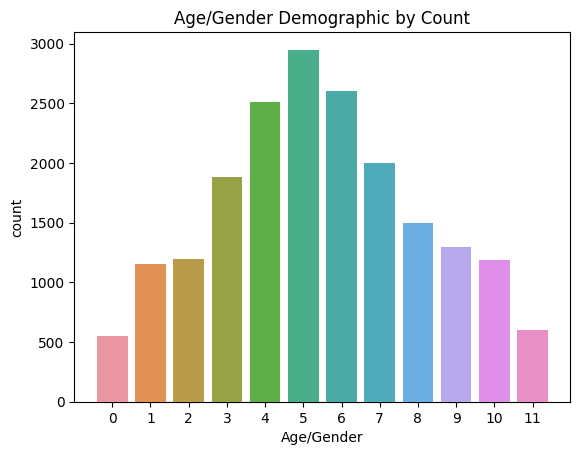

- It seems like most of the data is for non-active apps, however 1/5 of the data is still good for  active apps.


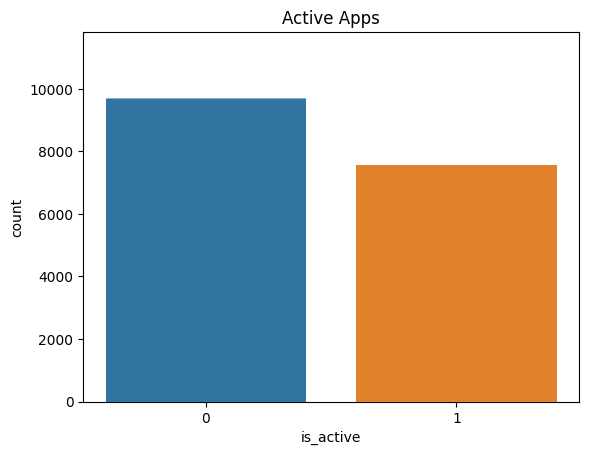

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11')
y_pos = np.arange(len(objects))
performance = [550,1152,1199,1880, 2510,2950,2600, 2000, 1500, 1300, 1185, 600]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('count')
plt.title('Age/Gender')

plt.show()

In [ ]:
# When finished with cleaning, save it as a csv to use for future notebooks and save time
master_df.to_csv("master_clean.csv", index=False)


In [ ]:
# Check to see if cleaned csv is in working directory
!dir


Analysis\ &\ Conclusion\ Summaries.ipynb
app_events.csv
app_labels.csv
Deep\ Learning.ipynb
events.csv
Exploratory\ Data\ Analysis.ipynb
gender_age_test.csv
gender_age_train.csv
label_categories.csv
master_clean_2.csv
master_clean.csv
Mobile\ Demographics\ -\ Predict\ Gender\ &\ Age.gslides
phone_brand_device_model.csv
Project\ Proposal\ &\ Information.ipynb
sample_submission.csv
Supervised\ Learning.ipynb
test\ merge.ipynb
Unsupervised\ Learning.ipynb
